# Implementation Of Time Series Model

In [3]:
import numpy as np 
import pandas as pd
import plotly as py
from plotly.offline import init_notebook_mode, iplot, plot

init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv(r"C:\Users\user\Downloads\cargoflash\time\DEOK_hourly1.csv",header = 0 , index_col = 0)

In [5]:
data.head(10)

,DEOK_MW
Datetime,
1/1/2012 1:00,2533
1/1/2012 2:00,2465
1/1/2012 3:00,2364
1/1/2012 4:00,2313
1/1/2012 5:00,2279
1/1/2012 6:00,2269
1/1/2012 7:00,2304
1/1/2012 8:00,2345
1/1/2012 9:00,2357


In [6]:
data.tail(10)

,DEOK_MW
Datetime,
12/31/2012 14:00,3243
12/31/2012 15:00,3234
12/31/2012 16:00,3252
12/31/2012 17:00,3257
12/31/2012 18:00,3433
12/31/2012 19:00,3484
12/31/2012 20:00,3358
12/31/2012 21:00,3242
12/31/2012 22:00,3124


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8781 entries, 1/1/2012 1:00 to 12/31/2012 23:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   DEOK_MW  8781 non-null   int64
dtypes: int64(1)
memory usage: 137.2+ KB


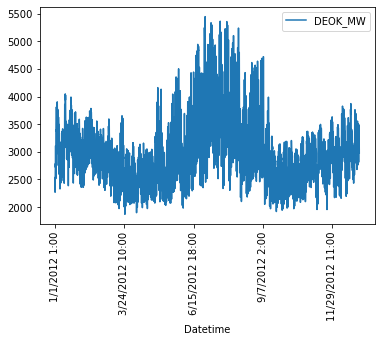

In [8]:
data.plot()
plt.xticks(rotation = 90)
plt.show()

## Check for AutoCorrelation

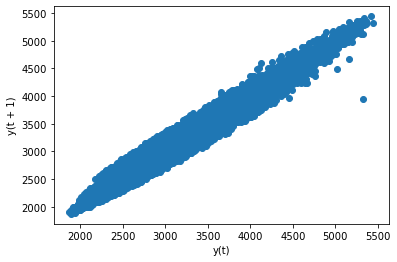

In [9]:
from pandas.plotting import lag_plot
lag_plot(data)
plt.show()

In [10]:
values = pd.DataFrame(data.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.976333
t+1  0.976333  1.000000


0.7587809415898322


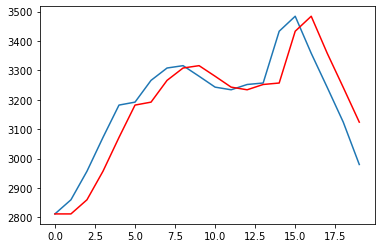

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = dataframe.values
train, test = X[1:len(X)-20], X[len(X)-20:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model

def model_persistence(x):
    return(x)

# Validations

predictions = list()

for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)

test_score = r2_score(test_y , predictions)

print(test_score)

# Actual Vs Predicted plot

plt.plot(test_y)
plt.plot(predictions , color = 'red')
plt.show()

## Implementing AR Model in python

In [12]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning:

The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 



Coefficients: [ 4.54591915e+00  1.56292130e+00 -6.30725951e-01  4.89461769e-02
  8.80973089e-03 -3.90198346e-02  1.11302821e-02  4.20906647e-03
 -9.51848372e-03  7.03130469e-03  9.87980508e-04  1.55844630e-02
  1.62651764e-02 -6.14639438e-02  3.85358822e-02 -2.92485528e-04
 -1.87588861e-02  4.26403993e-02  1.03766316e-02 -2.14638217e-02
 -7.17520847e-03  1.13305631e-02 -1.67330513e-02  5.52189479e-02
  1.71875548e-01 -2.92148098e-01  5.35335104e-02  3.50018318e-02
 -5.19574879e-03 -2.82776574e-04 -1.86998573e-02  9.89297081e-03
  3.83958618e-03 -8.47353771e-03  1.78430235e-02  1.05753407e-03
 -5.18002495e-03 -2.69329065e-02  3.15411360e-02  1.15342865e-03
 -3.10796293e-02  1.52667489e-02  1.31156183e-02 -3.31636444e-02
  2.86492214e-02 -5.09065422e-03 -2.95706983e-02  2.55303970e-02
  9.50070338e-02 -1.45391522e-01  1.09622554e-01 -8.63298684e-02
  3.05124375e-02 -8.96338984e-03  2.59683031e-02 -1.19601266e-02
 -1.36805188e-02  4.19426559e-03  1.85423155e-02 -1.91861597e-02
  4.4449257

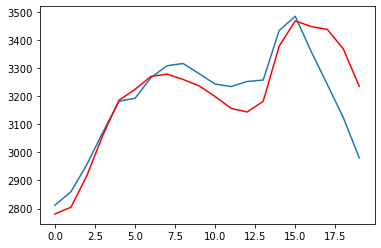

In [13]:
# split dataset
X = data.values
train, test = X[1:len(X)-20], X[len(X)-20:]


# train autoregression
model = AutoReg(train, lags=500)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)


# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
r2 = r2_score(test, predictions)
print('Test R2: %.3f' % r2)


# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## Implementing MA Model in python

## ARIMA(p,d,q)

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from random import random
import warnings
warnings.filterwarnings('ignore')

# fit model
model = ARIMA(data, order=(0, 0, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data)-20, len(data))
print(yhat)

8761    2888.152359
8762    2992.215038
8763    2938.543052
8764    3082.789900
8765    3054.790232
8766    3186.905150
8767    3069.997605
8768    3252.764238
8769    3118.000347
8770    3254.676326
8771    3089.363807
8772    3212.204667
8773    3085.985925
8774    3224.054716
8775    3096.660407
8776    3387.117006
8777    3157.871607
8778    3256.714290
8779    3051.033190
8780    3134.975286
8781    2916.753374
Name: predicted_mean, dtype: float64


## Implementing ARMA Model in python

In [15]:
# fit model
model = ARIMA(data, order=(2, 0, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

8781    2863.213603
dtype: float64


## Implementing ARIMA Model in python

In [16]:
# fit model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat)

8781    2862.455811
dtype: float64
